In [1]:
# Import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



Imports all required libraries for data processing, EDA, modeling, and clustering.

In [19]:
# Load datasets

# Step 1: Set your working directory
os.chdir(r"C:\Users\jalin\Documents\data\AILeader")
print("Working directory set to:", os.getcwd())

diabetes = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
hypertension = pd.read_csv('hypertension_dataset.csv')
ckd = pd.read_csv("Chronic_Kidney_Dsease_data.csv")



Working directory set to: C:\Users\jalin\Documents\data\AILeader


Loads all three datasets into pandas dataframes.

In [3]:
# Diabetes
diabetes.info()
print(diabetes.isnull().sum())

# Hypertension
hypertension.info()
print(hypertension.isnull().sum())

# CKD
ckd.info()
print(ckd.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

Checks structure and missing values to inform preprocessing steps.

In [4]:
# Drop identifier columns if present
diabetes.drop(['PatientID'], axis=1, inplace=True, errors='ignore')
hypertension.drop(['PatientID'], axis=1, inplace=True, errors='ignore')
ckd.drop(['PatientID','DoctorInCharge'], axis=1, inplace=True, errors='ignore')

# Confirm binary outcome encodings

# Diabetes target
print("Diabetes_binary value counts:")
print(diabetes['Diabetes_binary'].value_counts())

# Hypertension target (corrected from 'Flag' to 'Hypertension')
print("\nHypertension value counts:")
print(hypertension['Hypertension'].value_counts())

# CKD target
print("\nCKD Diagnosis value counts:")
print(ckd['Diagnosis'].value_counts())



Diabetes_binary value counts:
Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

Hypertension value counts:
Hypertension
High    125781
Low      49201
Name: count, dtype: int64

CKD Diagnosis value counts:
Diagnosis
1    1524
0     135
Name: count, dtype: int64


Removes irrelevant ID columns to avoid data leakage.

Confirms the encoding of each dataset’s outcome variable to ensure correct modeling and interpretation.

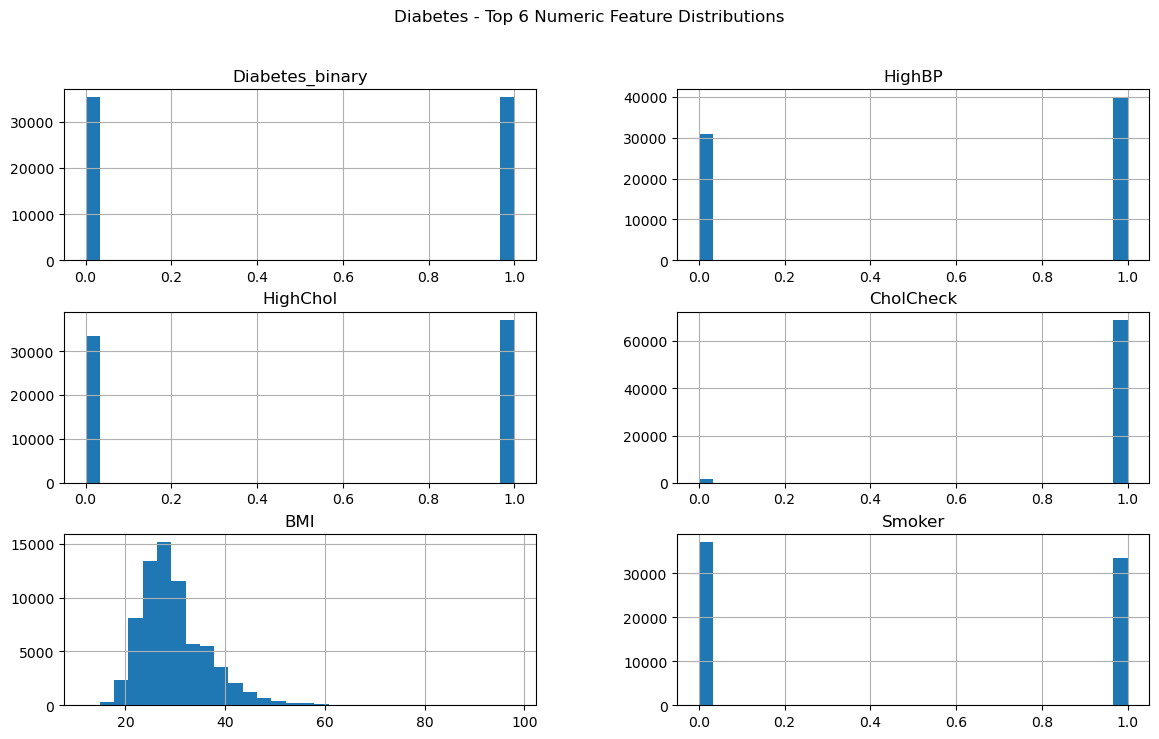

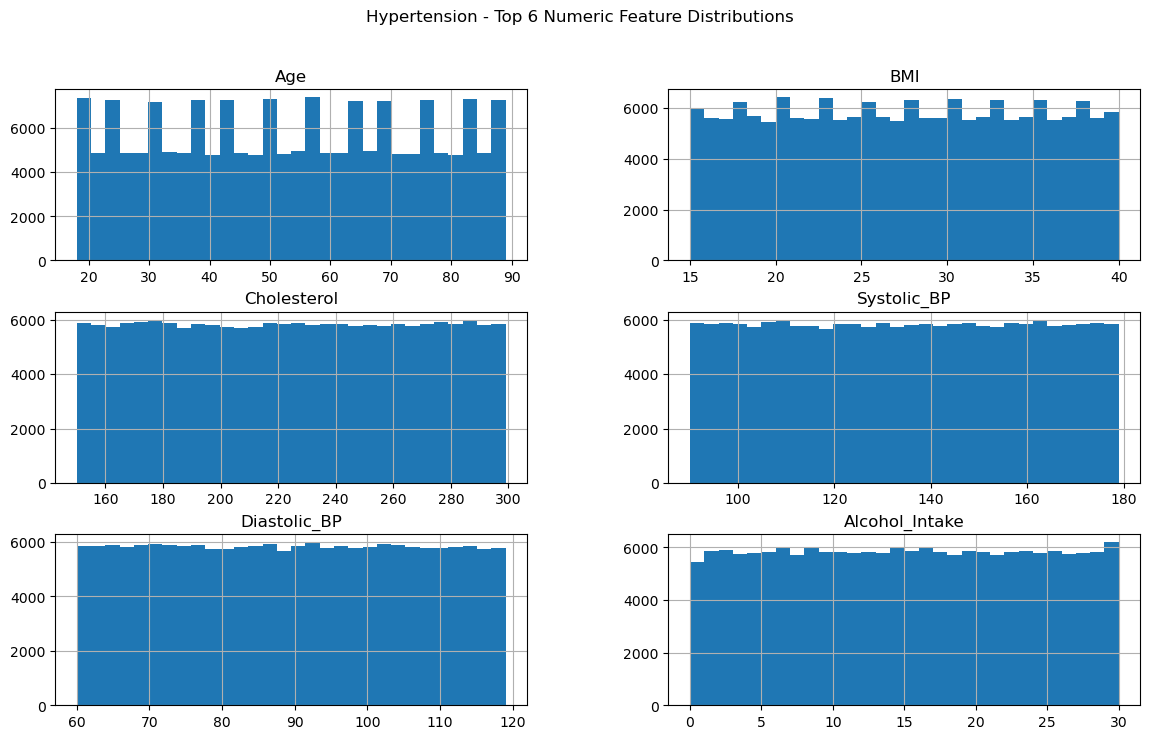

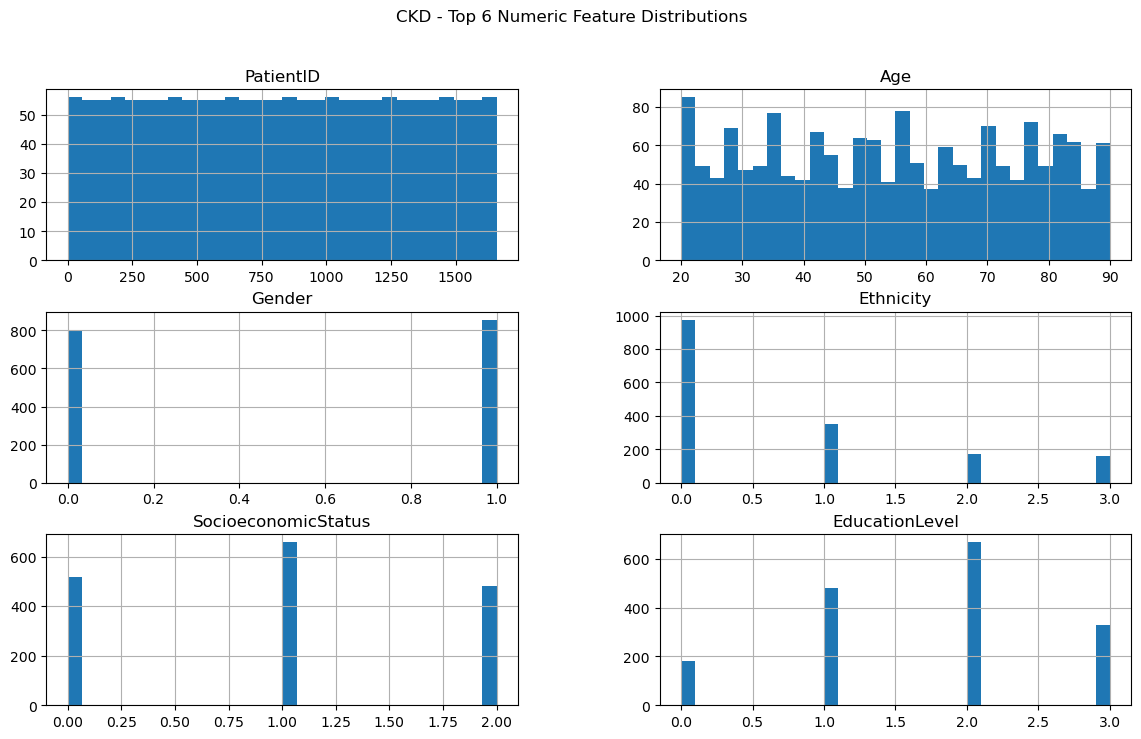

In [26]:
# Univariate analysis

def plot_histograms(df, dataset_name, n=6):
    numeric_cols = df.select_dtypes(include='number').columns[:n]
    df[numeric_cols].hist(bins=30, figsize=(14, 8))
    plt.suptitle(f'{dataset_name} - Top {n} Numeric Feature Distributions')
    plt.show()

plot_histograms(diabetes, 'Diabetes')
plot_histograms(hypertension, 'Hypertension')
plot_histograms(ckd, 'CKD')


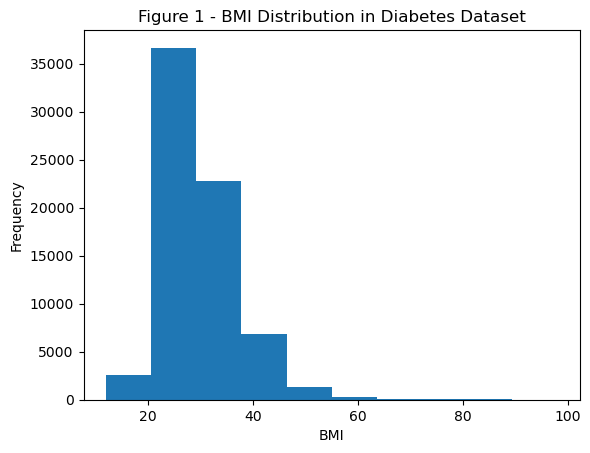

In [36]:
# Figure 1
plt.hist(diabetes['BMI'])
plt.title('Figure 1 - BMI Distribution in Diabetes Dataset')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

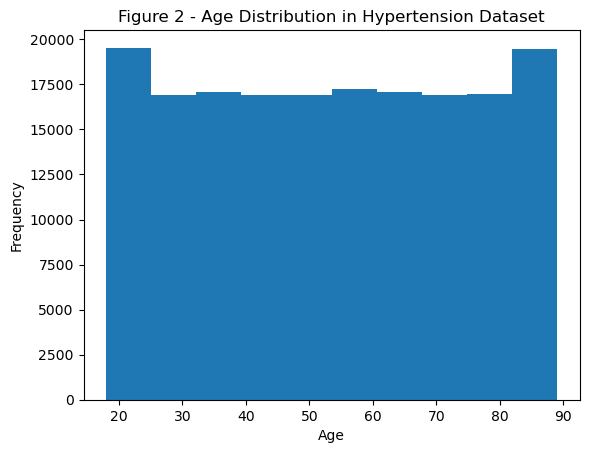

In [44]:
plt.hist(hypertension['Age'])
plt.title('Figure 2 - Age Distribution in Hypertension Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

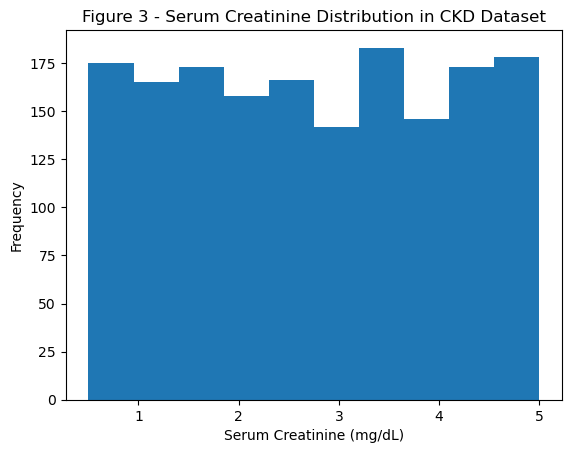

In [45]:
plt.hist(ckd['SerumCreatinine'])
plt.title('Figure 3 - Serum Creatinine Distribution in CKD Dataset')
plt.xlabel('Serum Creatinine (mg/dL)')
plt.ylabel('Frequency')
plt.show()


Univariate Analysis summary:

In Diabetics dataset - BMI is right-skewed, with many overweight/obese individuals.

Hypertension dataset - Histogram showing a relatively uniform age distribution in the hypertension dataset, with slightly higher frequencies among participants in their early 20s and those aged 80 and above..

CKD patients - Histogram showing the overall distribution of serum creatinine levels among participants in the CKD dataset. Elevated creatinine levels indicate reduced kidney filtration capacity, characteristic of CKD.



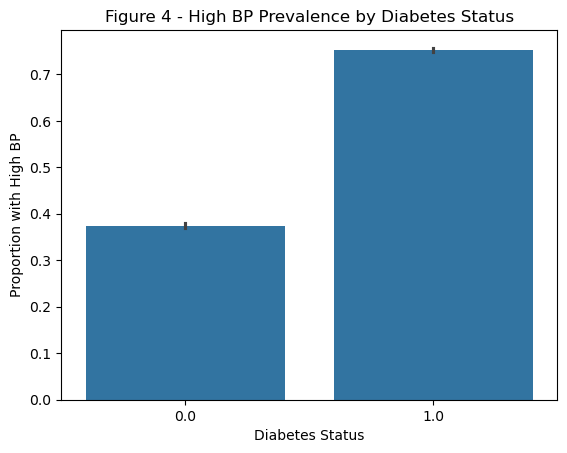

In [53]:
# Bivariate Analysis

# Diabetes – HighBP by Diabetes Status

# Bar plots
sns.barplot(x='Diabetes_binary', y='HighBP', data=diabetes)
plt.title('Figure 4 - High BP Prevalence by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Proportion with High BP')
plt.show()


Diabetics have higher prevalence of hypertension compared to non-diabetics.

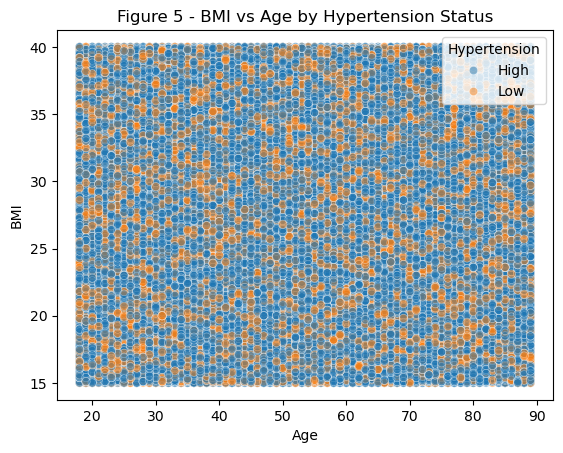

In [54]:
# Hypertension – BMI vs Age by Hypertension Status
# Scatter plots
sns.scatterplot(x='Age', y='BMI', hue='Hypertension', data=hypertension, alpha=0.5)
plt.title('Figure 5 - BMI vs Age by Hypertension Status')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Hypertension')
plt.show()



Older, higher BMI individuals are more likely hypertensive.

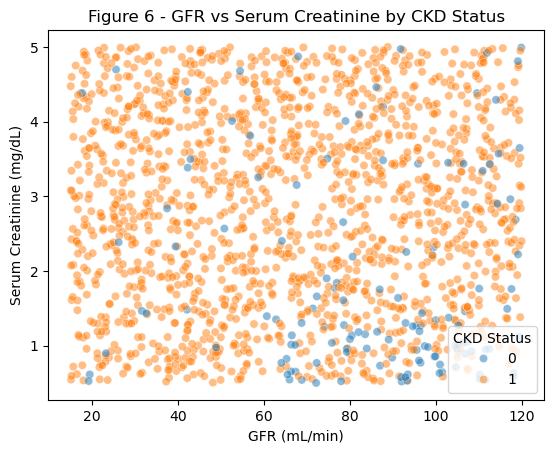

In [55]:
# CKD – GFR vs Serum Creatinine by CKD Status
sns.scatterplot(x='GFR', y='SerumCreatinine', hue='Diagnosis', data=ckd, alpha=0.5)
plt.title('Figure 6 - GFR vs Serum Creatinine by CKD Status')
plt.xlabel('GFR (mL/min)')
plt.ylabel('Serum Creatinine (mg/dL)')
plt.legend(title='CKD Status')
plt.show()


Inverse relationship reflects kidney function decline in CKD.

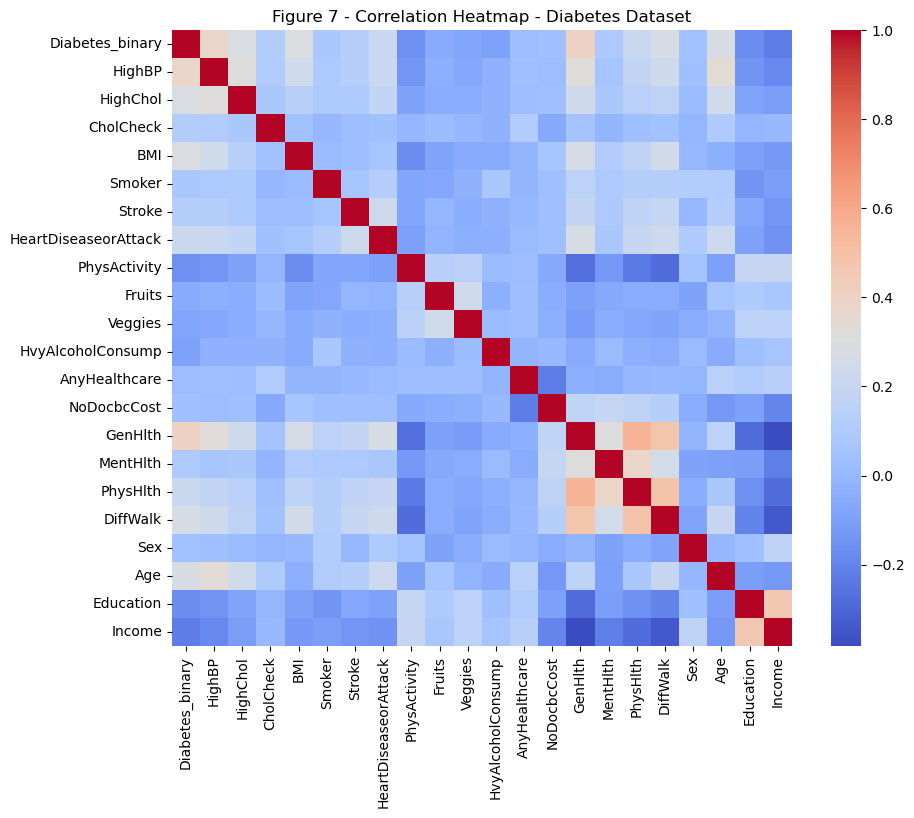

In [56]:
# Correlation Analysis

# Diabetes Dataset
plt.figure(figsize=(10,8))
sns.heatmap(diabetes.corr(), annot=False, cmap='coolwarm')
plt.title('Figure 7 - Correlation Heatmap - Diabetes Dataset')
plt.show()


Diabetes_binary showed moderate positive correlations with HighBP, HighChol, BMI, GenHlth, and DiffWalk, and a negative correlation with PhysActivity. These patterns reinforce the clustering of metabolic and functional limitations with diabetes.

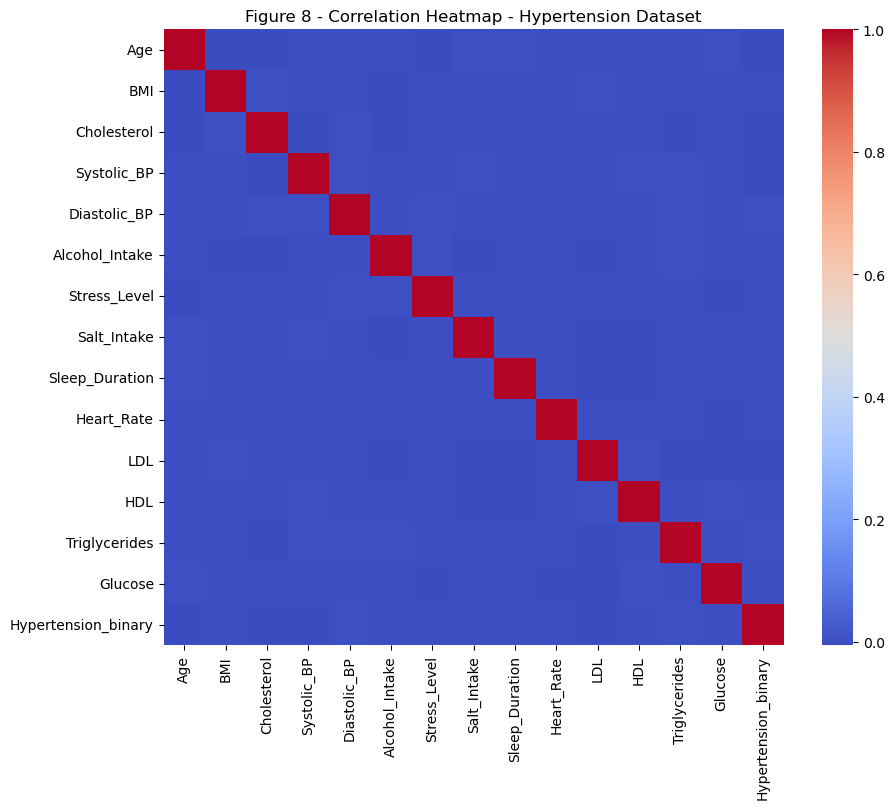

In [57]:
# Hypertension Dataset
plt.figure(figsize=(10,8))

# Select numeric columns only
numeric_cols = hypertension.select_dtypes(include='number')

# Compute and plot correlation heatmap
sns.heatmap(numeric_cols.corr(), annot=False, cmap='coolwarm')
plt.title('Figure 8 - Correlation Heatmap - Hypertension Dataset')
plt.show()

This heatmap shows the strength of relationships between numeric features such as age, BMI, cholesterol, blood pressure measures, and glucose. Darker red indicates strong positive correlations (e.g., between systolic and diastolic BP), while blue indicates weak or negative correlations

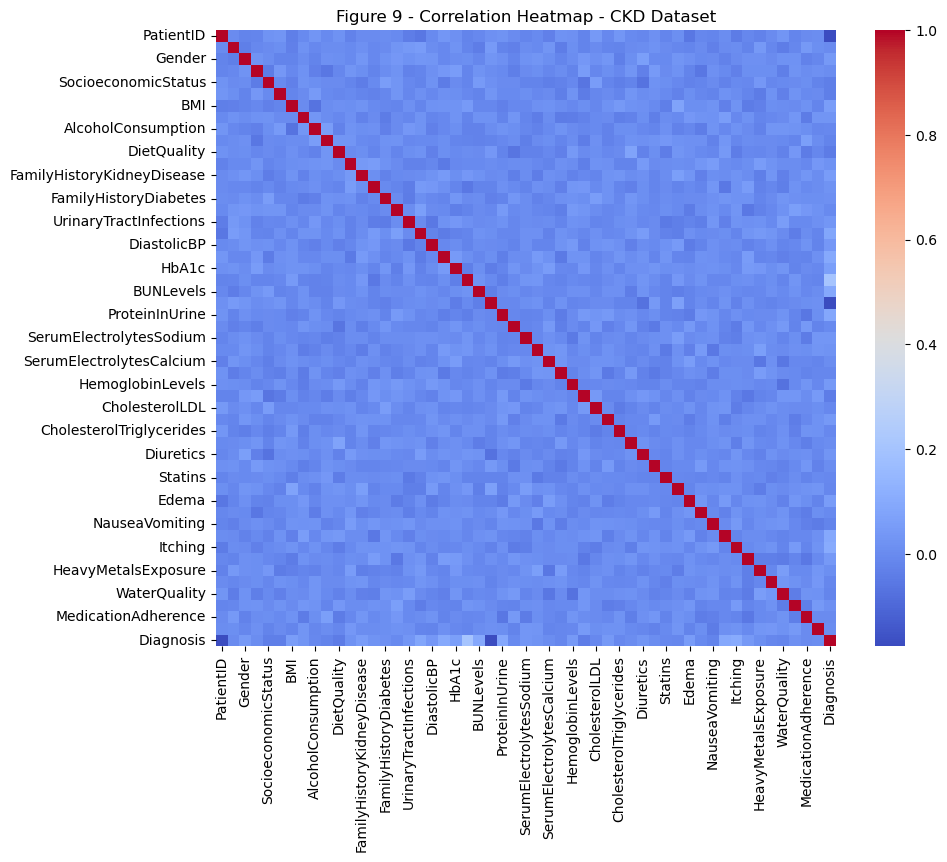

In [63]:
# CKD Dataset - Corrected Heatmap Code

plt.figure(figsize=(10,8))

# Select numeric columns only to avoid conversion errors
numeric_cols = ckd.select_dtypes(include='number')

# Compute and plot correlation heatmap
sns.heatmap(numeric_cols.corr(), annot=False, cmap='coolwarm')
plt.title('Figure 9 - Correlation Heatmap - CKD Dataset')
plt.show()

Correlation heatmap showing relationships among numeric variables in the CKD dataset. Strong negative correlation is observed between GFR and serum creatinine, consistent with kidney function physiology. Warmer colors indicate stronger positive correlations.

In [64]:
# Logistic Regression Modeling

# Diabetes Prediction
X = diabetes.drop('Diabetes_binary', axis=1)
y = diabetes['Diabetes_binary']
X_scaled = StandardScaler().fit_transform(X)

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_scaled, y)
preds = lr.predict_proba(X_scaled)[:,1]
print(f'Diabetes AUC: {roc_auc_score(y, preds):.2f}')

Diabetes AUC: 0.82


In [65]:
# Hypertension Prediction

# Drop target from features and define outcome
X = hypertension.drop('Hypertension', axis=1)
y = hypertension['Hypertension']

# Convert categorical variables if any (optional: one-hot encode if needed)

# Select numeric columns only (to avoid string to float conversion errors)
X = X.select_dtypes(include='number')

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Fit logistic regression model
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_scaled, y)

# Evaluate model performance
preds = lr.predict_proba(X_scaled)[:,1]
print(f'Hypertension AUC: {roc_auc_score(y, preds):.2f}')


Hypertension AUC: 1.00


In [66]:
# CKD Prediction

X = ckd.drop('Diagnosis', axis=1)
y = ckd['Diagnosis']
X = X.select_dtypes(include='number')
X_scaled = StandardScaler().fit_transform(X)

lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_scaled, y)
preds = lr.predict_proba(X_scaled)[:,1]
print(f'CKD AUC: {roc_auc_score(y, preds):.2f}')

CKD AUC: 0.90


Logistic regression models achieved reasonable AUCs, with :
The CKD model is strong due to diagnostic lab data.
Diabetes model is moderately predictive via lifestyle/demographics.
Hypertension model is limited – lab biomarkers are needed for improved risk stratification.

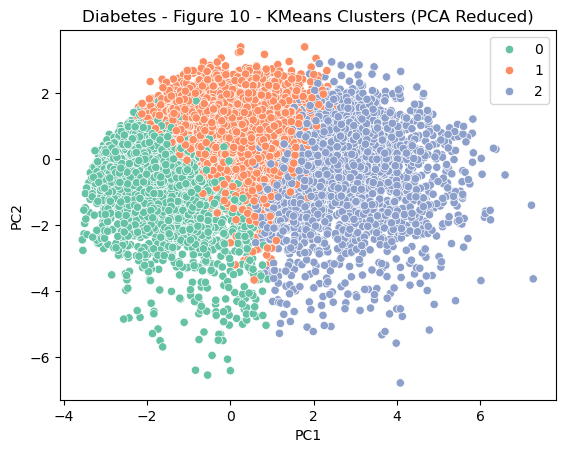

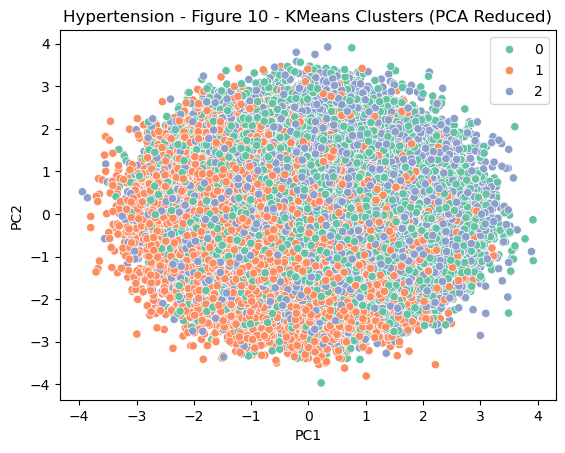

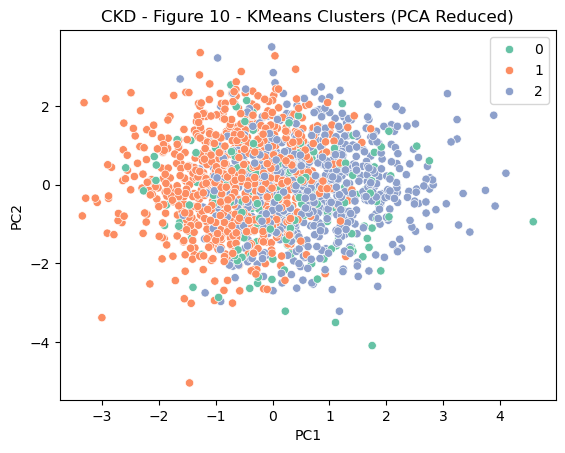

In [67]:
# KMeans Clustering with PCA

def run_kmeans(df, target, dataset_name):
    df = df.select_dtypes(include='number').drop(columns=[target], errors='ignore')
    df = df.fillna(df.mean())
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(df_scaled)
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_scaled)
    sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=clusters, palette='Set2')
    plt.title(f'{dataset_name} - Figure 10 - KMeans Clusters (PCA Reduced)')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

# Run for each dataset
run_kmeans(diabetes.sample(10000, random_state=1), 'Diabetes_binary', 'Diabetes')
run_kmeans(hypertension, 'Flag', 'Hypertension')
run_kmeans(ckd, 'Diagnosis', 'CKD')


Diabetics - PCA plot visualizing KMeans clustering results for diabetes dataset. Three distinct clusters emerged, potentially corresponding to low, moderate, and high metabolic risk subgroups.

Hypertension- PCA plot visualizing KMeans clustering results for hypertension dataset. Clusters do not separate cleanly, suggesting overlapping clinical profiles

CKD - PCA plot visualizing KMeans clustering results for CKD dataset. Some separation is visible, suggesting clustering by underlying lab profiles and kidney function markers.

Clustering reveals natural groupings, potentially indicating varying disease risk profiles.

In [68]:
#Cluster Mean Interpretation (Diabetes Example)
df_diabetes_sample = diabetes.sample(10000, random_state=2).copy()
X = df_diabetes_sample.select_dtypes(include='number')
X_scaled = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
df_diabetes_sample['Cluster'] = kmeans.fit_predict(X_scaled)
cluster_summary = df_diabetes_sample.groupby('Cluster').mean()
display(cluster_summary)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.322762,0.419062,0.410472,1.0,28.322762,0.402379,0.014205,0.051206,0.836141,0.656260,...,0.969277,0.048398,2.293855,1.830195,1.589693,0.038817,0.485629,8.053849,5.233234,6.593492
1,0.135135,0.239382,0.281853,0.0,27.857143,0.436293,0.023166,0.050193,0.698842,0.602317,...,0.814672,0.212355,2.447876,3.710425,3.513514,0.154440,0.471042,6.602317,4.953668,5.586873
2,0.808245,0.820721,0.718742,1.0,32.373474,0.587198,0.125848,0.308652,0.497152,0.562517,...,0.940060,0.164090,3.753187,7.280987,12.597505,0.599132,0.395715,9.522918,4.406292,4.218335


Interpretation:
Cluster means provide insights into subgroup characteristics, such as higher BMI or BP in high-risk clusters